<a href="https://colab.research.google.com/github/kky107102/ML_TEAM8/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'cifake-real-and-ai-generated-synthetic-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3041726%2F5256696%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T114636Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4c2c26cab5cb7c837889707f8762258eb0b1d0b5b4ba95dcab9d481cec4473d296eea1625fdbe8be9e129241b27659c39d7dff575578e81ae42d583bf56dde0decf79c46ef8b95e3cfdc1525f547f098104fbcb008d3916310e51c86aa0f35627fd9445f71cb365d2be75bba9f2d84414886f308407fba821b7a3b9b57e109fce97c723441b079ff21058884127306d207233bcd30f0ae94a7ffad83a6e5874c1188fd793357663e85b5346a9d599e82b810dbb2d6404bc0a8aad03bd2697fdda8f0e5a7da808ec140c6ea89205f3aa3edff69b7ab3029da704b9b1a80f79128c82cc25296373cc28aa1f4d347ad41c29a537ab4203b433ae525f89625066593,ai-generated-images-vs-real-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4423404%2F7598969%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T114636Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2208ad5aac29ed9137fd2683a76ed47dd133783b26371fe7b089f59c4e0e0c8dcfb4cd58e323a1532e8499719252f790733650208a8c209d3e70c2c254ae656466ac8efedc6f46fe0646f7d13c1c8595ff46e664d5a7cb1960c2be7a09cd6bf19cfe6df0b7bf6462d33b82b6ae653daeb4e745c70c8fa882dc41e904fd78b9a9101537bb657f786cdcb41fb26780b60407b3a3651071ddd9c59db5e6d2b178084db01b40d2502e651280db5f2afd6fb811979e36e37e64894131d9f1db3b0b991d954baa5a66de32d881f95b8703eee58f03a0a1cd3480f067e109241c291ad6c2af055ef77e0ac9066da0c2cd7a0957b3b6e5080d131d7c98204b3dcf445e9a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 109625224 bytes downloaded
Downloaded and uncompressed: cifake-real-and-ai-generated-synthetic-images
[==================================================] 499048119 bytes downloaded
Downloaded and uncompressed: ai-generated-images-vs-real-images
Data source import complete.


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Fine-tuning CNN - 97.08% made by ACHAL GUPTA 를 참고함   
https://www.kaggle.com/code/guptaachal02/fine-tuning-cnn-97-08   
Apache Licence 적용을 받음   

**데이터 처리**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from IPython.display import Image

데이터 가져오기

In [4]:
dataset_dir1 = "/kaggle/input/ai-generated-images-vs-real-images/"
dataset_dir2 = "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/" # For Kaggle notebooks. If you run locally, point this line to the CIFAKE directory
print("Loading dataset from: " + dataset_dir2)

Loading dataset from: /kaggle/input/cifake-real-and-ai-generated-synthetic-images/


In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
img_height = 32
img_width = 32
batch_size = 600
dir1_1 = tf.keras.utils.image_dataset_from_directory(
  dataset_dir1 + "/AiArtData",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

dir1_2 = tf.keras.utils.image_dataset_from_directory(
  dataset_dir1 + "/RealArt",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)


def set_labels_to_value(image, label):
    new_label = tf.fill(tf.shape(label), 1)  # 예시: 모든 라벨 값을 1로 설정
    return image, new_label
# 데이터셋에 변환 함수 적용
dir1_2 = dir1_2.map(set_labels_to_value)


dir2_1 = tf.keras.utils.image_dataset_from_directory(
  dataset_dir2 + "/train",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

dir2_2 = tf.keras.utils.image_dataset_from_directory(
  dataset_dir2 + "/test",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)


for i, l in dir1_1.take(5):
  print("label:",l)
dir1_dataset = dir1_1.concatenate(dir1_2)
print(len(dir1_dataset))
dir2_dataset = dir2_1.concatenate(dir2_2)
final_dataset = dir1_dataset.concatenate(dir2_dataset)





Found 536 files belonging to 1 classes.
Found 435 files belonging to 1 classes.
Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.
label: tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [7]:
final_shuffled_dataset = final_dataset.shuffle(buffer_size=len(final_dataset), seed=400) #데이터셋 섞기

In [8]:
len(final_shuffled_dataset)

203

In [9]:
dataset_size = len(final_dataset)
train_validation_size = int(dataset_size * 0.8) #train과 test사이즈를 80%
test_size = dataset_size - train_validation_size
train_validation_dataset = final_shuffled_dataset.take(train_validation_size)
test_dataset = final_shuffled_dataset.skip(train_validation_size)


train_size = int(train_validation_size * 0.8) #train 데이터셋 사이즈를 75
validation_size = train_validation_size - train_size
train_dataset = train_validation_dataset.take(train_size)
validation_dataset = train_validation_dataset.skip(train_size)


print("train_dataset size:",len(train_dataset))
print("validation_dataset size:",len(validation_dataset))
print("test_dataset size",len(test_dataset))


train_dataset size: 129
validation_dataset size: 33
test_dataset size 41


**ResNet 모델로 Transfer Learning**

In [10]:
# Building the Transfer Learning model using ResNet50
ResNet_base_model = tf.keras.applications.ResNet50(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
ResNet_base_model.trainable = True

# Create a new model on top of the ResNet50 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = ResNet_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
ResNet_model = tf.keras.Model(inputs, outputs)

# Compile the model
ResNet_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Summary of the model
ResNet_model.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448  

In [11]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

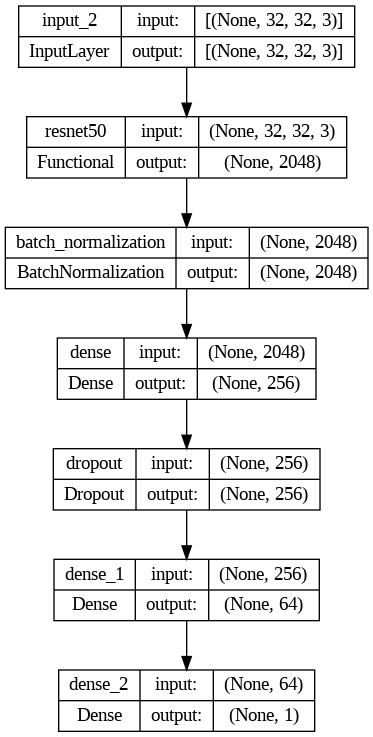

In [12]:
# Visualize the ResNet model architecture
tf.keras.utils.plot_model(ResNet_model, show_shapes = True, to_file = 'ResNet_model.png')
Image('ResNet_model.png')

In [13]:
# Train the Transfer Learning model
print("Starting training with Transfer Learning using ResNet50...")
ResNet_model_history = ResNet_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 5,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using ResNet50...
Epoch 1/5
129/129 [==============================] - 72s 217ms/step - loss: 2.2433 - accuracy: 0.8972 - precision: 0.8902 - recall: 0.9044 - val_loss: 2.4072 - val_accuracy: 0.5956 - val_precision: 0.9994 - val_recall: 0.1715
Epoch 2/5
129/129 [==============================] - 29s 166ms/step - loss: 0.7471 - accuracy: 0.9341 - precision: 0.9358 - recall: 0.9319 - val_loss: 0.5834 - val_accuracy: 0.9433 - val_precision: 0.9151 - val_recall: 0.9781
Epoch 3/5
129/129 [==============================] - 28s 164ms/step - loss: 0.4742 - accuracy: 0.9430 - precision: 0.9447 - recall: 0.9412 - val_loss: 0.5324 - val_accuracy: 0.9033 - val_precision: 0.9925 - val_recall: 0.8128
Epoch 4/5
129/129 [==============================] - 25s 139ms/step - loss: 0.3577 - accuracy: 0.9519 - precision: 0.9574 - recall: 0.9465 - val_loss: 0.3584 - val_accuracy: 0.9582 - val_precision: 0.9565 - val_recall: 0.9593
Epoch 5/5
129/129 [==================

In [14]:
# Evaluate the model on the vaildation dataset
val_loss, val_accuracy, val_precision, val_recall = ResNet_model.evaluate(validation_dataset)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

33/33 [==============================] - 9s 46ms/step - loss: 0.3447 - accuracy: 0.9390 - precision: 0.9103 - recall: 0.9747
Val Loss: 0.3447
Val Accuracy: 0.9390
Val Precision: 0.9103
Val Recall: 0.9747


In [15]:
# 데스트 데이터 셋
test_loss, test_accuracy, test_precision, test_recall = ResNet_model.evaluate(test_dataset)

print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")

41/41 [==============================] - 8s 22ms/step - loss: 0.3519 - accuracy: 0.9361 - precision: 0.9048 - recall: 0.9715
test Loss: 0.3519
test Accuracy: 0.9361
test Precision: 0.9048
test Recall: 0.9715


In [40]:
# 실제 테스트
dir3 = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/images",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)
from google.colab import drive
import os
from PIL import Image
import torch
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# 이미지 로드 및 전처리
image = Image.open("/content/drive/MyDrive/images/Real/11.png").convert("RGB")
image = preprocess(image).unsqueeze(0)  # 배치 차원 추가


preds = ResNet_model.eval(image)




Found 2 files belonging to 2 classes.


AttributeError: 'Functional' object has no attribute 'eval'

1/1 [==============================] - 0s 27ms/step
Predicted: [[0.00524201]]


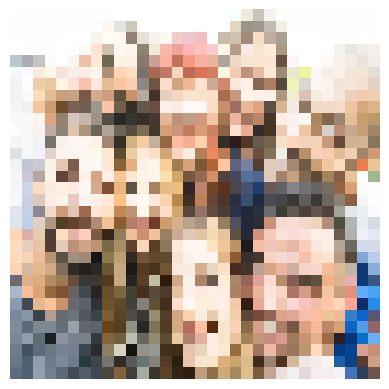

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt

# ResNet50 모델 불러오기 (ImageNet 가중치 사용)

# 이미지 파일 경로
img_path = '/content/drive/MyDrive/images/Real/33.jpg'  # 여기에 실제 이미지 파일 경로를 입력하세요.

# 이미지 로드 및 전처리
img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 예측 수행
preds = ResNet_model.predict(x)

# 결과 디코딩 및 출력
print('Predicted:', preds)

# 이미지 출력
plt.imshow(img)
plt.axis('off')
plt.show()

**VGG16 모델**

In [ ]:
# Building the Transfer Learning model using VGG16
VGG_base_model = tf.keras.applications.VGG16(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
VGG_base_model.trainable = True



In [ ]:
# Create a new model on top of the VGG16 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = VGG_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
VGG_model = tf.keras.Model(inputs, outputs)


In [ ]:
# Compile the Transfer Learning model
VGG_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Build the Transfer Learning model so we can see a summary
VGG_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 batch_normalization_4 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                16448     
                                                           

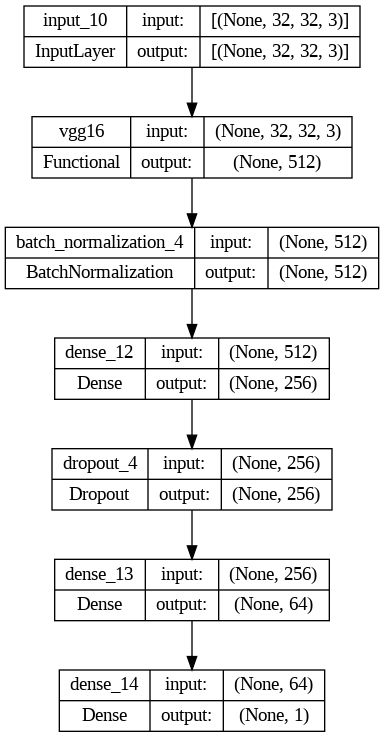

In [ ]:
# Visualize the VGG model architecture
tf.keras.utils.plot_model(VGG_model, show_shapes = True, to_file = 'VGG_model.png')
Image('VGG_model.png')

In [ ]:
print("Starting training with Transfer Learning using VGG16...")
VGG_model_history = VGG_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 5,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using VGG16...
Epoch 1/5
129/129 [==============================] - 32s 159ms/step - loss: 2.0665 - accuracy: 0.6435 - precision_4: 0.6253 - recall_4: 0.7037 - val_loss: 1.3486 - val_accuracy: 0.5967 - val_precision_4: 0.5559 - val_recall_4: 0.9900
Epoch 2/5
129/129 [==============================] - 27s 155ms/step - loss: 0.7596 - accuracy: 0.8438 - precision_4: 0.8171 - recall_4: 0.8870 - val_loss: 1.5829 - val_accuracy: 0.5061 - val_precision_4: 0.5058 - val_recall_4: 1.0000
Epoch 3/5
129/129 [==============================] - 27s 154ms/step - loss: 0.4312 - accuracy: 0.9133 - precision_4: 0.9041 - recall_4: 0.9237 - val_loss: 1.2692 - val_accuracy: 0.5020 - val_precision_4: 0.4994 - val_recall_4: 1.0000
Epoch 4/5
129/129 [==============================] - 27s 154ms/step - loss: 0.3085 - accuracy: 0.9307 - precision_4: 0.9282 - recall_4: 0.9335 - val_loss: 0.3564 - val_accuracy: 0.9152 - val_precision_4: 0.8709 - val_recall_4: 0.9740
Epoch 5/

validation_dataset으로 검증

In [ ]:

val_loss, val_accuracy, val_precision, val_recall = VGG_model.evaluate(validation_dataset)

# Print the metrics
print(f"val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

33/33 [==============================] - 8s 36ms/step - loss: 0.2734 - accuracy: 0.9258 - precision_4: 0.9753 - recall_4: 0.8727
val Loss: 0.2734
Val Accuracy: 0.9258
Val Precision: 0.9753
Val Recall: 0.8727


테스트셋으로 검증

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, test_precision, test_recall = VGG_model.evaluate(test_dataset)

# Print the metrics
print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")

41/41 [==============================] - 9s 36ms/step - loss: 0.2740 - accuracy: 0.9260 - precision_4: 0.9733 - recall_4: 0.8753
test Loss: 0.2740
test Accuracy: 0.9260
test Precision: 0.9733
test Recall: 0.8753


**EfficientNet모델**

In [ ]:
# Building the Transfer Learning model using EfficientNetV2B0
EfficientNet_base_model = tf.keras.applications.EfficientNetV2B0(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
EfficientNet_base_model.trainable = True

# Create a new model on top of the EfficientNet base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = EfficientNet_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
EfficientNet_model = tf.keras.Model(inputs, outputs)

# Compile the Transfer Learning model
EfficientNet_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Build the Transfer Learning model so we can see a summary
EfficientNet_model.summary()

24274472/24274472 [==============================] - 2s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 efficientnetv2-b0 (Functio  (None, 1280)              5919312   
 nal)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 1280)              5120      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 256)               327936    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                            

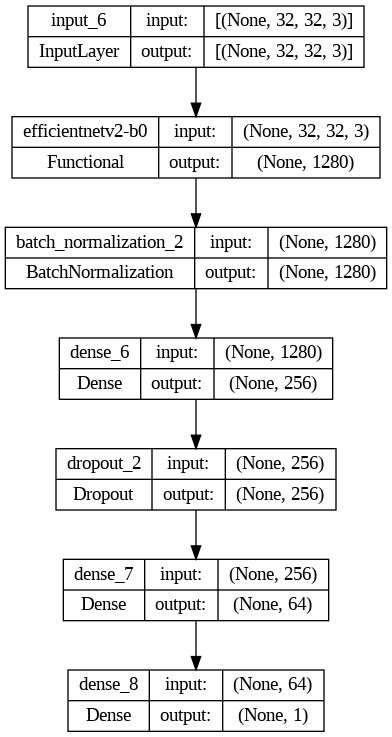

In [ ]:
# Visualize the EfficientNet model architecture
tf.keras.utils.plot_model(EfficientNet_model, show_shapes = True, to_file = 'EfficientNet_model.png')
Image('EfficientNet_model.png')

In [ ]:
# Finally, train the Transfer Learning model
print("Starting training with Transfer Learning using EfficientNet...")
EfficientNet_model_history = EfficientNet_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 5,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using EfficientNet...
Epoch 1/5
129/129 [==============================] - 29s 174ms/step - loss: 0.2263 - accuracy: 0.9659 - precision_2: 0.9686 - recall_2: 0.9626 - val_loss: 0.2083 - val_accuracy: 0.9748 - val_precision_2: 0.9920 - val_recall_2: 0.9566
Epoch 2/5
129/129 [==============================] - 29s 173ms/step - loss: 0.1768 - accuracy: 0.9772 - precision_2: 0.9779 - recall_2: 0.9764 - val_loss: 0.1532 - val_accuracy: 0.9847 - val_precision_2: 0.9868 - val_recall_2: 0.9824
Epoch 3/5
129/129 [==============================] - 29s 172ms/step - loss: 0.1530 - accuracy: 0.9820 - precision_2: 0.9829 - recall_2: 0.9812 - val_loss: 0.1397 - val_accuracy: 0.9833 - val_precision_2: 0.9933 - val_recall_2: 0.9728
Epoch 4/5
129/129 [==============================] - 29s 172ms/step - loss: 0.1527 - accuracy: 0.9773 - precision_2: 0.9791 - recall_2: 0.9754 - val_loss: 0.1195 - val_accuracy: 0.9884 - val_precision_2: 0.9935 - val_recall_2: 0.9833
E

In [ ]:

val_loss, val_accuracy, val_precision, val_recall = EfficientNet_model.evaluate(test_dataset)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

41/41 [==============================] - 8s 26ms/step - loss: 0.1873 - accuracy: 0.9670 - precision_2: 0.9756 - recall_2: 0.9578
Val Loss: 0.1873
Val Accuracy: 0.9670
Val Precision: 0.9756
Val Recall: 0.9578


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, test_precision, test_recall = EfficientNet_model.evaluate(test_dataset)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

41/41 [==============================] - 8s 19ms/step - loss: 0.1215 - accuracy: 0.9855 - precision_2: 0.9783 - recall_2: 0.9931
Val Loss: 0.1873
Val Accuracy: 0.9670
Val Precision: 0.9756
Val Recall: 0.9578


**MobileNet 모델로 Transfer Learning**

In [ ]:
# Building the Transfer Learning model using MobileNetV3
MobileNet_base_model = tf.keras.applications.MobileNetV3Small(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
MobileNet_base_model.trainable = True

4334752/4334752 [==============================] - 1s 0us/step


In [ ]:
# Create a new model on top of the MobileNet base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = MobileNet_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
MobileNet_model = tf.keras.Model(inputs, outputs)

In [ ]:
# Compile the Transfer Learning model
MobileNet_model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Build the Transfer Learning model so we can see a summary
MobileNet_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 MobilenetV3small (Function  (None, 576)               939120    
 al)                                                             
                                                                 
 batch_normalization_3 (Bat  (None, 576)               2304      
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 256)               147712    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                1644

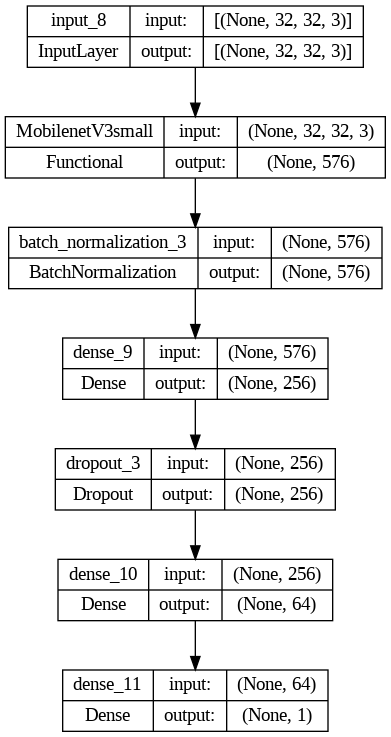

In [ ]:
# Visualize the MobileNet model architecture
tf.keras.utils.plot_model(MobileNet_model, show_shapes = True, to_file = 'MobileNet_model.png')
Image('MobileNet_model.png')

In [ ]:
# Finally, train the Transfer Learning model
print("Starting training with Transfer Learning using MobileNet...")
MobileNet_model_history = MobileNet_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 5,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using MobileNet...
Epoch 1/5
129/129 [==============================] - 21s 106ms/step - loss: 0.1790 - accuracy: 0.9445 - precision_3: 0.9494 - recall_3: 0.9400 - val_loss: 0.3219 - val_accuracy: 0.8836 - val_precision_3: 0.9940 - val_recall_3: 0.7713
Epoch 2/5
129/129 [==============================] - 21s 106ms/step - loss: 0.1642 - accuracy: 0.9498 - precision_3: 0.9458 - recall_3: 0.9533 - val_loss: 0.4713 - val_accuracy: 0.8514 - val_precision_3: 0.9932 - val_recall_3: 0.7054
Epoch 3/5
129/129 [==============================] - 21s 105ms/step - loss: 0.1727 - accuracy: 0.9467 - precision_3: 0.9487 - recall_3: 0.9447 - val_loss: 0.6994 - val_accuracy: 0.6827 - val_precision_3: 0.9992 - val_recall_3: 0.3667
Epoch 4/5
129/129 [==============================] - 21s 106ms/step - loss: 0.1527 - accuracy: 0.9527 - precision_3: 0.9473 - recall_3: 0.9579 - val_loss: 0.2450 - val_accuracy: 0.9295 - val_precision_3: 0.9849 - val_recall_3: 0.8746
Epoc

In [ ]:

val_loss, val_accuracy, val_precision, val_recall = MobileNet_model.evaluate(validation_dataset)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

33/33 [==============================] - 7s 9ms/step - loss: 0.2771 - accuracy: 0.9211 - precision_3: 0.8698 - recall_3: 0.9918
Val Loss: 0.2771
Val Accuracy: 0.9211
Val Precision: 0.8698
Val Recall: 0.9918


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, test_precision, test_recall = MobileNet_model.evaluate(test_dataset)

# Print the metrics
print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")

41/41 [==============================] - 8s 9ms/step - loss: 0.2836 - accuracy: 0.9177 - precision_3: 0.8730 - recall_3: 0.9804
test Loss: 0.2836
test Accuracy: 0.9177
test Precision: 0.8730
test Recall: 0.9804
